In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
data = pd.read_csv('diabetes.csv')

In [189]:
df = data.copy()

In [190]:
df.shape

(768, 9)

In [191]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


374 rows where insulin is 0
227 rows where Skin thickness is 0

In [192]:
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [193]:
y = df[['Outcome']]
X = df.drop(columns='Outcome')

In [194]:
X = X.replace(0, np.nan)

In [195]:
X = X.interpolate()


In [196]:
(X == 0).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [197]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 48.1 KB


In [198]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,765.000000,768.000000,768.000000,768.000000
mean,4.445312,121.492839,72.330729,29.080078,159.045098,32.465365,0.471876,33.240885
std,3.080499,30.546675,12.207864,9.887474,111.597578,6.889880,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.000000,64.000000,22.000000,88.000000,27.500000,0.243750,24.000000
50%,4.000000,117.000000,72.000000,29.000000,130.000000,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,36.000000,190.500000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


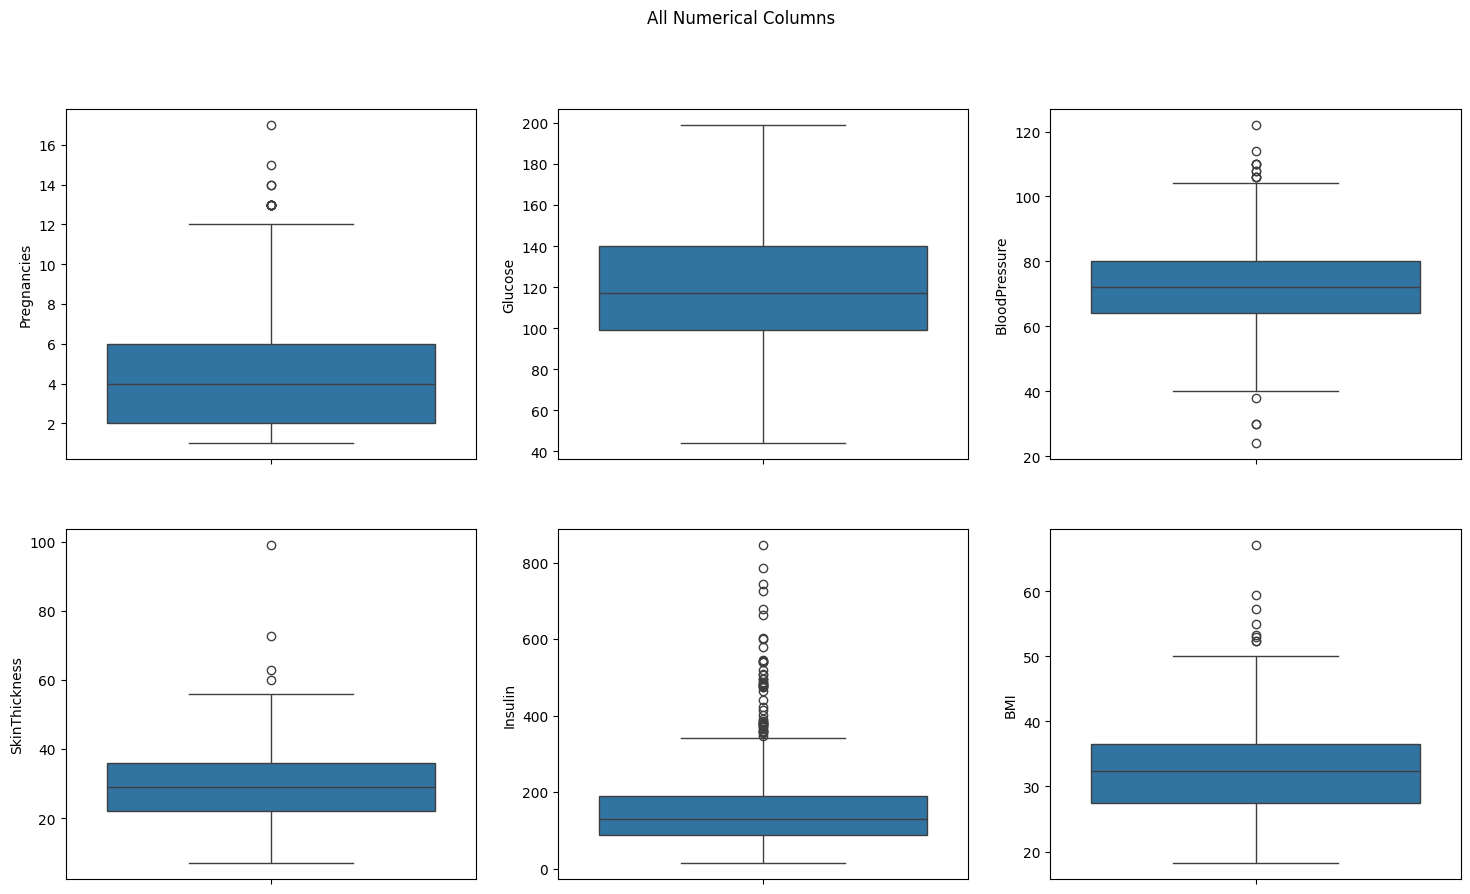

In [199]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('All Numerical Columns')

sns.boxplot(ax=axes[0, 0], data=X['Pregnancies'] )
sns.boxplot(ax=axes[0, 1], data=X['Glucose'] )
sns.boxplot(ax=axes[0, 2], data=X['BloodPressure'])
sns.boxplot(ax=axes[1, 0], data=X['SkinThickness'])
sns.boxplot(ax=axes[1, 1], data=X['Insulin'])
sns.boxplot(ax=axes[1, 2], data=X['BMI'])
plt.show()

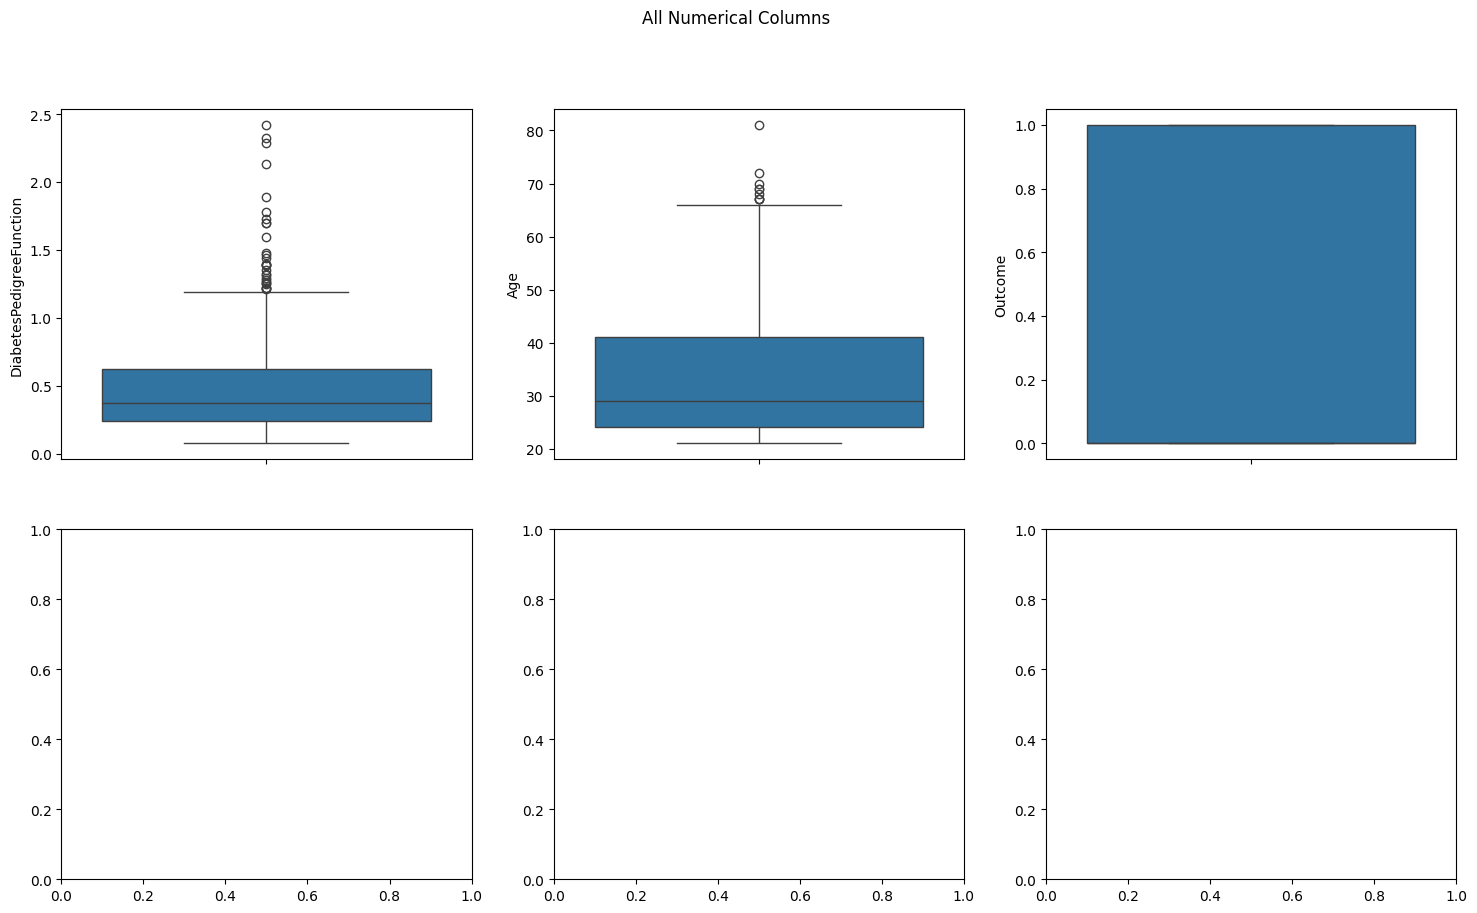

In [200]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('All Numerical Columns')
sns.boxplot(ax=axes[0, 0], data=X['DiabetesPedigreeFunction'])
sns.boxplot(ax=axes[0, 1], data=X['Age'])
sns.boxplot(ax=axes[0, 2], data=y['Outcome'])
plt.show()

In [201]:
X = X.dropna()

In [202]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33
5,5.0,116.0,74.0,33.5,128.0,25.6,0.201,30
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26
7,10.0,115.0,60.0,38.5,315.5,35.3,0.134,29
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,146.0,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,27.0,112.0,30.1,0.349,47


In [206]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.153998,0.234575,0.110758,0.130733,0.091269,-0.025628,0.491918
Glucose,0.153998,1.000000,0.218942,0.184653,0.363819,0.235013,0.136750,0.267875
BloodPressure,0.234575,0.218942,1.000000,0.174956,0.050052,0.272801,-0.004853,0.318773
SkinThickness,0.110758,0.184653,0.174956,1.000000,0.139070,0.495170,0.102968,0.129844
Insulin,0.130733,0.363819,0.050052,0.139070,1.000000,0.136288,0.100157,0.161513
BMI,0.091269,0.235013,0.272801,0.495170,0.136288,1.000000,0.158025,0.025355
DiabetesPedigreeFunction,-0.025628,0.136750,-0.004853,0.102968,0.100157,0.158025,1.000000,0.032742
Age,0.491918,0.267875,0.318773,0.129844,0.161513,0.025355,0.032742,1.000000


In [207]:
df2 = X.join(y)

In [209]:
df2.shape

(765, 9)

In [210]:
df2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [211]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [212]:
(df2 == 0).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     499
dtype: int64